In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df = df.rename(columns={
   'Annual Income (k$)' : 'annual_income',
     'Spending Score (1-100)' : 'spend_score'
    
})
#column ko name change gareko nothing else(sajilo ko lagi)


In [17]:
df.head()

,CustomerID,Gender,Age,annual_income,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
x = df[['annual_income','spend_score']]
x.head()

,annual_income,spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
optimal number of cluster how to find out?
-> Elbow method


### Pipeline and PCA(Principle Component Analysis)

### PIPELINE
yeuta task vayepachhi arko task gardei chhaa bhaney pipeline banauna sakchhan
eg: kNN gareraa matraa model fit gareko chham
eg: scaling gareraa model fit gardei chham 
yesto belaa scaling chhutei model fit chhutei gari raknu pardena piplelining use garnaa sakenchha.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
#if pipeline use  nagarne ho bhane 
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)


In [22]:
mdoel = KMeans(n_clusters=4)

In [23]:
#pipeline use garene vaye
pipeline_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(n_clusters=4))
])

In [24]:
pipeline_model.fit(x)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('model', KMeans(n_clusters=4))])

In [ ]:
x ,y
xtrain , xtest, ytrain,ytest


In [ ]:
xtrans = scaler.fit_transform(xtrain)
xtests = scaler.fit(xtest)
#yesto garda scling ra model fit both gardenchha.

In [26]:
pmodel = pipeline([
    ('scaler',StandardScaler()),
    ('model',KNeighborsClassifier())
    
])

NameError: name 'pipeline' is not defined

### PCA

In [ ]:
-To reduce the dimemnsion of dataa.
-suppose kunei dataa ma large number of columns chha, 
-kailey kahi sano dataset banako better hunchaha large data bataa, teslel fardaa information preserve gardenchhaa, dimension ghataidenchhaa

In [ ]:
Data : large number of columns

In [25]:
data = pd.read_csv('wine.data.csv')
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
data.shape

(178, 14)

In [ ]:
columns yeahaa 14 chhaa.
row chai 178.
yehaa dimension dataa ko dhrei chhaa
now hamile data ko dimension reduce garaidenaa sakchham , information preserve gareraa using PCA

### PCA

In [28]:
from sklearn.decomposition import PCA

In [35]:
#class lai drop garnaa parchhaa so
data['Class'].unique()

array([1, 2, 3], dtype=int64)

In [38]:
df = data.drop('Class', axis = 1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
from sklearn.decomposition import PCA

In [ ]:
malai chaiyeko 5 otaa matraa columns ho so


In [46]:
pca = PCA(n_components = 5) #n_components ma akti value rakhney ta?
#yo kuraa determine garnu parchhaa.
#that is done on the absics of eigen value and eigen vector
dfnew = pca.fit_transform(df)       

In [47]:
dfnew

array([[ 3.18562979e+02,  2.14921307e+01, -3.13073470e+00,
         2.50113758e-01, -6.77078222e-01],
       [ 3.03097420e+02, -5.36471768e+00, -6.82283550e+00,
         8.64034749e-01,  4.86095978e-01],
       [ 4.38061133e+02, -6.53730945e+00,  1.11322298e+00,
        -9.12410681e-01, -3.80651426e-01],
       [ 7.33240139e+02,  1.92729032e-01,  9.17257016e-01,
         5.41250645e-01, -8.58662289e-01],
       [-1.15714285e+01,  1.84899946e+01,  5.54422076e-01,
        -1.36089609e+00, -2.76441556e-01],
       [ 7.03231192e+02, -3.32158674e-01, -9.49375334e-01,
         3.59993827e-01, -1.56827100e-01],
       [ 5.42971581e+02, -1.35189666e+01, -2.12694283e+00,
        -5.55661430e-02,  4.83659661e-01],
       [ 5.48401860e+02,  1.14494324e+01, -4.04924202e-02,
        -1.34945380e+00,  8.52590856e-01],
       [ 2.98036863e+02, -8.18015784e+00, -3.88097517e+00,
         9.10643037e-01, -3.11488981e-01],
       [ 2.98049553e+02, -7.10154294e+00, -1.55845533e+00,
         1.67704202e+00

In [48]:
dfnew = pd.DataFrame(dfn)
dfnew.head()
#yo aako columns chai mathi ko all columns ko overall information ho 

,0,1,2,3,4
0,318.562979,21.492131,-3.130735,0.250114,-0.677078
1,303.097420,-5.364718,-6.822835,0.864035,0.486096
2,438.061133,-6.537309,1.113223,-0.912411,-0.380651
3,733.240139,0.192729,0.917257,0.541251,-0.858662
4,-11.571428,18.489995,0.554422,-1.360896,-0.276442


In [ ]:
yo 5 ottaa columns ma mathi ko 13 otaaa column ko information haru chha.



In [ ]:
#eigen value eigen vector

Ax = /x
x = eigen veector
/ = eigen value
    

In [ ]:
pca = PCA(n_components = 5) yehaaa 5 nai kina use no of components gareko ta?

In [ ]:
tesko lagi find out garne 2 approaches
1) Kaiser's Rule
2) Scree plot

In [49]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
pca = PCA()
dfn = pca.fit_transform(df)

In [57]:
dfnew = pd.DataFrame(dfn)
dfnew

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,-3.130735,0.250114,-0.677078,0.568081,0.619642,0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,-6.822835,0.864035,0.486096,0.014340,-0.108865,-0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,1.113223,-0.912411,-0.380651,0.672404,-0.785819,0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,0.917257,0.541251,-0.858662,0.599122,-0.018770,-0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,0.554422,-1.360896,-0.276442,0.768884,0.309976,-0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,2.474707,3.155920,2.348927,1.439001,0.026425,-0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,4.309931,1.562181,1.168003,0.128679,-0.003859,0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,2.237577,4.820708,1.057336,0.215000,-0.648489,-0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,1.788392,3.709352,0.276956,-1.009229,-0.414948,0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


In [ ]:
dfnew.DataFrame

In [ ]:
#kaiser rule: See the eigen values and select thos e who have eigen values more than 1. 
teti matraa column banaune ajti sammaa eigen value more than 1 chha. 

In [54]:
eigenvalues = pca.explained_variance_
eigenvalues

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

In [ ]:
pca.expalined_variance_ratio_
#kun kun columns le kati percentage variance explain garnaa sakeko chhaa.

In [ ]:
#scree plot

hijo ko jasto plot ho
x ko value => jati otaa eigen chhaa teti otaa value

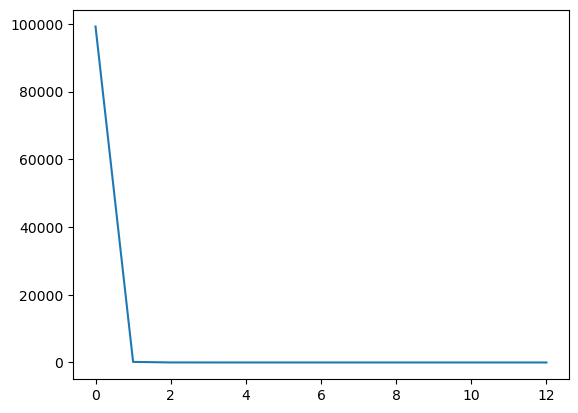

In [56]:
#scree plot
plt.plot(range(13),eigenvalues)
plt.show()

In [ ]:
kind of elbow method -> scaree 